# Analyzing Your Transcript: Speech Turns and Dictionaries

**NOTE:** Click [here](https://colab.research.google.com/github/senthilchandrasegaran/IDEM105-EDI/blob/main/03-reading-transcript-files.ipynb) to open the file in Colab.

## Load Transcript Text
Let's load your Transcript file from BrightSpace. Download your file and save it in a folder that allows you to load the file into this Notebook.
If you are using Colab, you would need to first upload the file to Google Drive and then specify the link in the `read_excel` command below.

Since this is an excel file, you will need to use a python library called *pandas* to read and process files as tables or "DataFrames".

In [34]:
import pandas as pd
# Use 'pd' as a shortcut for 'pandas' as it saves you the effort of typing 'pandas' every time.

It is convention to add a `_df` suffix to all variables that represent dataframes. So we load the transcript into a variable called `transcript_df`.

In [35]:
transcript_df = pd.read_excel('/content/Finalised Transcript Final Assignment.xlsx')
# Print a random sample of the dataframe, showing 5 rows.
transcript_df.sample(5)

,Unnamed: 0,timestamp,speaker,utterance
451,451,00:44:46,Stan,Or maybe just rename the park to talk to each ...
100,100,00:12:31,Ruben,"Yeah, even for example at night when there are..."
398,398,00:39:49,Stan,Yeah. OK.
427,427,00:42:47,Julia,"Because we as young kids, we also wanted away ..."
413,413,00:41:42,Stan,"Remote sounds like, but I feel like it's more ..."


This format is helpful, because just like we do in excel, we can count the rows, filter the table by a particular column value, and other manipulations of the table. We will explore a few of these approaches, but only in the context of what we are interested in, i.e., the analysis of the conversation recorded as the transcript.

For instance, we can check how many speech turns (i.e., rows in the excel sheet) have been captured in the transcript.

In [36]:
print("Total number of speech turns : ", transcript_df.shape[0])

Total number of speech turns :  1046


## Analyzing participation
Participation in a conversation is very subjective, and thus there is no one objective measure for it. However, we can explore a few aspects of participation. These could be the number of "speech turns", or the number of times a speaker spoke, or "utterance length": which could be how long (in time) a speaker spoke, or how long (in words) their utterances were.

### Number of Speech Turns
Let's start simple. Who had the most speech turns?

In [37]:
# Let's first get a list of speakers attributed to each speech turn.
speakers = transcript_df['speaker'].to_list()

# We use the 'Counter' function from the 'collections' library to count the number of speech turns by speaker.
from collections import Counter
speaker_turn_counts = Counter(speakers)
print(speaker_turn_counts)

Counter({'Stan': 293, 'Xavier': 288, 'Julia': 254, 'Ruben': 208, nan: 3})


---

#### NOTE:
If you see any cases of misspelled speakers, or speaker names you think are wrong, it would be apparent in the above list.

Go back to the excel file, fix the speakers if necessary, and run the above cells again until you get only the expected number of speakers.

---

#### Plotting the result
We can also plot the speech turns for a nice graphical representation.
First, let's create a new dataframe with the calculated information.

In [38]:
# Convert the 'counter' object that we have called `speaker_turn_counts' into a table, and then plot it.
turns_df = pd.DataFrame.from_dict(speaker_turn_counts, orient='index').reset_index()
turns_df

,index,0
0,Xavier,288
1,Ruben,208
2,Stan,293
3,Julia,254
4,NaN,3


The column headers look awkward, so we can rename them.

In [39]:
turns_df = turns_df.rename(columns={"index": "Speaker", 0: "Turns"})
turns_df

,Speaker,Turns
0,Xavier,288
1,Ruben,208
2,Stan,293
3,Julia,254
4,NaN,3


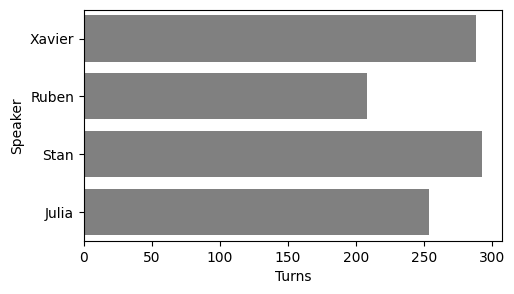

In [40]:
# Import the plotting library
import matplotlib.pyplot as plt
import seaborn as sns

scale = 0.6
figure_height = turns_df.shape[0] * scale
figure_width = figure_height * 3 * scale
plt.figure(figsize=(figure_width, figure_height))
g = sns.barplot(data=turns_df, x="Turns", y="Speaker", color='gray')

## Tokenization & Word Count
Last week, we tried tokenization of the entire transcript. This time, let's do it by speech turn.

In [41]:
import nltk
nltk.download('punkt_tab')  # comment this line after the first time you run this code.
from nltk import word_tokenize

# Make a list of all utterances in the transcript
utterances_list = transcript_df['utterance'].to_list()

# Iterate over this list and tokenize every utterance, saving the utterances as one list,
# and corresponding word counts as another list.
utterance_tokenized_list = []
utterance_word_counts = []
for utterance in utterances_list :
    tokens = word_tokenize(utterance)
    word_count = len(tokens)
    utterance_tokenized_list.append(tokens)
    utterance_word_counts.append(word_count)

# Add the new information to the existing dataframe as a new column.
transcript_df['utterance_tokens'] = utterance_tokenized_list
transcript_df['word_count'] = utterance_word_counts

# Let's take a look at our dataframe to see the new columns.
transcript_df.sample(3)


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,Unnamed: 0,timestamp,speaker,utterance,utterance_tokens,word_count
383,383,00:38:44,Stan,"Dog. So if I understand it well, the biggest m...","[Dog, ., So, if, I, understand, it, well, ,, t...",36
195,195,00:24:32,Ruben,And how we think that compares. So in that way.,"[And, how, we, think, that, compares, ., So, i...",12
606,606,00:57:29,Ruben,You can play some music in the park.,"[You, can, play, some, music, in, the, park, .]",9


In [42]:
# Let's use an eariler variable we established to get a non-repeating list of speakers.

speaker_names = turns_df['Speaker'].to_list()
speaker_word_counts = []

for speaker_name in speaker_names :
    speaker_df = transcript_df[transcript_df['speaker'] == speaker_name]
    speaker_wc = speaker_df['word_count'].sum()
    speaker_word_counts.append(speaker_wc)

if "Word Count" not in turns_df.columns :
    turns_df.insert(2, "Word Count", speaker_word_counts)
turns_df

,Speaker,Turns,Word Count
0,Xavier,288,5969
1,Ruben,208,3649
2,Stan,293,5085
3,Julia,254,4014
4,NaN,3,0


Let's try that plot again, this time with word counts.

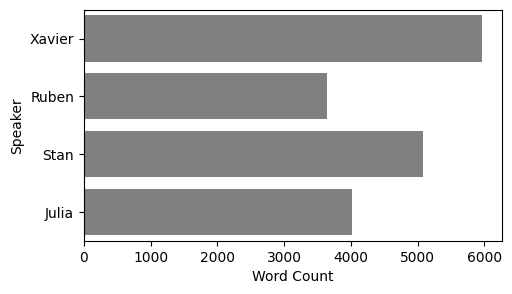

In [43]:
plt.figure(figsize=(figure_width, figure_height))
g = sns.barplot(data=turns_df, x="Word Count", y="Speaker", color='gray')

You can also try plotting the relationship between the turns and the word counts.

Is the relationship linear? How else would you analyse turns vs words spoken?

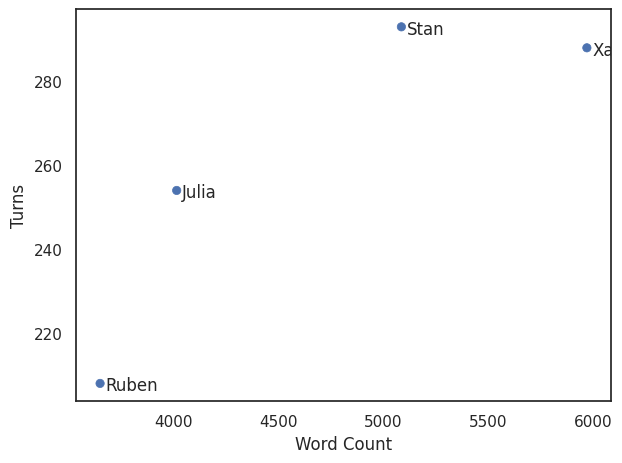

In [44]:
# sns.scatterplot(data=turns_df, x="Word Count", y="Turns", color="gray")

from seaborn import axes_style
import seaborn.objects as so
so.Plot.config.theme.update(axes_style("white"))
p = so.Plot(data=turns_df, x="Word Count", y="Turns", text='Speaker').add(so.Dot(marker='o')).add(so.Text(halign='left')).show()

## Dictionary Categories
As you may have gathered from the reading assignments, dictionary categories in LIWC each have a list of words associated with that particular psycholinguistic process. For our example, let's look at the category `tentat` which indicates "tentativeness", often associated in design discussions with the proposal of an idea or a softening of judgement.

Let's first load the words in this category via a file that I have created for you.

In [45]:
with open('/content/tentative.txt', 'r') as fo:
    dictionary_terms_list = fo.readlines()

# We get rid of extraneous carriage return (\n) characters from the text
dictionary_terms_list = [w.strip('\n') for w in dictionary_terms_list]
print(dictionary_terms_list)

['allege*', 'almost', 'ambigu*', 'ambivalen*', 'any', 'anybod*', 'anyhow', 'anyone*', 'anything', 'anytime*', 'anywhere*', 'apparently', 'appears', 'apprehens*', 'approximat*', 'arbitrary*', 'assum*', 'assumed', 'barely', 'bet', 'bets', 'broadly', 'chance', 'chances', 'confus*', 'confuse', 'confuses', 'confusing', 'contingen*', 'debatable', 'depend', 'depended', 'depending', 'depends', 'doubt*', 'doubted', 'doubtful', 'doubtless*', 'dubious', 'dubiously', 'dunno', 'estimat*', 'fairly', 'feasib', 'feasible', 'generally', 'guess*', 'guessed', 'guesses', 'guessing', 'hardly', 'hazarding', 'hazy', 'hesita*', 'hope', 'hoped', 'hopeful*', 'hopefully', 'hopes', 'hoping', 'hypothes*', 'hypothetic*', 'if', 'iirc', 'imo', 'indecis*', 'indefinit*', 'indirect*', "isn't sure", 'kind of', 'kinda', 'kindof', 'largely', 'likel*', 'likely', 'loosely', 'marginal*', 'may', 'mayb', 'maybe', 'might', "might'nt", "might've", "mightn't", 'mightve', 'mildly', 'mostly', 'myster*', 'mysterious', 'mysteriously',

## Finding matches between dictionary and text
The next step is to find how many terms from the text match the terms in the dictionary category, and to count every match. Note that I use the word "term" and not "word", since there are a number of multi-word terms in the dictionary, such as `kind of`.

There are also some wildcards, indicated by `*`. A wildcard character indicates a general pattern. For instance, `option*` will return a match to `option`, `options`, `optional`, and `optionally`.

Due to these wildcards and multi-word terms, we cannot simply use a token-by-token match to perform dictionary term matching. Instead, we will have to find patterns in the original text that match the patterns indicated in the dictionary entries. This includes single- and multi-word terms as well as terms that use wildcards. To achieve this, we will use a concept called [**regular expressions**](https://en.wikipedia.org/wiki/Regular_expression). In python, regular expressions are largely implemented using the ["`re`" library](https://docs.python.org/3/howto/regex.html#regex-howto).

In [46]:
import re

def count_matches(text, pattern):
    if pattern.startswith('*') :
        pattern = r"[A-Za-z]*" + pattern[1:]

    if pattern.endswith('*') :
        pattern = pattern[:-1] + r"[A-Za-z]*'"

    m = r"\b" + pattern + r"\b"
    matches = re.findall(pattern, text)
    return len(matches)

The above function that we have written, called `count_matches` looks for a given single- or multi-word pattern and returns the number of matches in a given text.

See the example below for a demonstration of this code.

In [47]:
test = "or sort sort of like make a... yeah. like some sort of video."
num_matches = count_matches(test, 'sort of')
print("Number of matches:", num_matches)

Number of matches: 2


In [48]:
dict_term_counts = [0] * transcript_df.shape[0]

for ind, utterance in enumerate(utterances_list) :
    for dict_term in dictionary_terms_list :
        term_counts_in_utterance = count_matches(utterance.lower(), dict_term)
        dict_term_counts[ind] += term_counts_in_utterance

transcript_df["tentat_counts"] = dict_term_counts
transcript_df.sample(3)

,Unnamed: 0,timestamp,speaker,utterance,utterance_tokens,word_count,tentat_counts
532,532,00:50:10,Xavier,Or play a game with them.,"[Or, play, a, game, with, them, .]",7,1
646,646,00:59:23,Ruben,So then the park still stays natural. You're l...,"[So, then, the, park, still, stays, natural, ....",18,0
1022,1022,01:26:59,Julia,"Creative or interactive, I think.","[Creative, or, interactive, ,, I, think, .]",7,1


In [49]:
def dict_term_score(dict_term_counts, word_count):
    dict_score = dict_term_counts/word_count
    return dict_score

transcript_df['liwc_tentat_score'] = transcript_df.apply(lambda x: dict_term_score(x['tentat_counts'], x['word_count']), axis=1)
transcript_df.sample(5)

,Unnamed: 0,timestamp,speaker,utterance,utterance_tokens,word_count,tentat_counts,liwc_tentat_score
651,651,00:59:35,Ruben,Oh yeah.,"[Oh, yeah, .]",3,0,0.000000
730,730,01:03:57,Xavier,"I'd love to put up the brightspace on there, b...","[I, 'd, love, to, put, up, the, brightspace, o...",18,0,0.000000
526,526,00:49:37,Julia,Okay then lets go to the park.,"[Okay, then, lets, go, to, the, park, .]",8,0,0.000000
271,271,00:29:40,Xavier,Uhm I mean. I like that. Because he was an arc...,"[Uhm, I, mean, ., I, like, that, ., Because, h...",22,1,0.045455
695,695,01:02:03,Ruben,"You fake it, you look.","[You, fake, it, ,, you, look, .]",7,0,0.000000


In [50]:
tentat_df = transcript_df[transcript_df['liwc_tentat_score'] > 0]
print("Number of speech turns with a tentativeness score above zero:", tentat_df.shape[0])

Number of speech turns with a tentativeness score above zero: 402


In [51]:
dict_matches_for_speakers = []

for speaker_name in speaker_names :
    speaker_df = transcript_df[transcript_df['speaker'] == speaker_name]
    speech = ' '.join(speaker_df['utterance'].to_list()).lower()
    dict_matches = 0
    for dict_term in dictionary_terms_list :
        term_counts_in_utterance = count_matches(speech, dict_term)
        dict_matches += term_counts_in_utterance
    dict_matches_for_speakers.append(dict_matches)

if "Tentative Words" not in turns_df.columns :
    turns_df.insert(3, "Tentative Words", dict_matches_for_speakers)
if "Tentativeness Score" not in turns_df.columns :
    turns_df["Tentativeness Score"] = turns_df["Tentative Words"] / turns_df["Word Count"]
turns_df

,Speaker,Turns,Word Count,Tentative Words,Tentativeness Score
0,Xavier,288,5969,403,0.067515
1,Ruben,208,3649,170,0.046588
2,Stan,293,5085,266,0.052311
3,Julia,254,4014,216,0.053812
4,NaN,3,0,0,NaN


### Save your results!
You can save your results as an excel file.

In [52]:
transcript_df.to_excel('/content/Saves/StanFinal_transcript_with_dict_score.xlsx')

### Concordance Analysis
Since dictionary-based scores are not sensitive to the contexts of word use, it might be a good idea to examine the contexts of word use.

For this purpose, we use a **KWIC** or **K**ey**W**ord **I**n **C**ontext view that shows all occurrences of a word of interest in the context of its surrounding text.

In [53]:
from nltk.text import Text
transcript_text = ' '.join(transcript_df['utterance'].to_list()).lower()
tokens = word_tokenize(transcript_text)
textList = Text(tokens)

for term in dictionary_terms_list :
    print("Looking for occurrences of", term, "...")
    textList.concordance(term, width=85, lines=25)

Looking for occurrences of allege* ...
no matches
Looking for occurrences of almost ...
Displaying 8 of 8 matches:
? yeah . yes . yeah . she often visits almost only alone because she runs through th
ey 're having their own thing , and it almost feels like i should n't be there 'caus
s like i should n't be there 'cause it almost feels like an an outside open space , 
em in another direction and they would almost immediately agree that that was ok , e
oblem about homeless people . so it 's almost feels like during my discussions , if 
f i had n't mentioned something , they almost would n't mention it themselves . mhm 
sically , walkway through the park and almost nothing else is lit and then you feel 
 the right or to the left i ’ m like , almost in darkness . yeah , yeah . no , i tot
Looking for occurrences of ambigu* ...
no matches
Looking for occurrences of ambivalen* ...
no matches
Looking for occurrences of any ...
Displaying 4 of 4 matches:
over . mm hmm yeah . did she have , like

In [54]:
# In case you are looking for a specific term:
specific_term = "anything"
textList.concordance(specific_term, width=85, lines=25)

Displaying 10 of 10 matches:
esign or something like that could be anything , yeah . so some requirements maybe o
ht ? did she say when ? there was n't anything ? no , that that was n't really speci
eryone shares everything so ( .. ) uh anything that might happen that 's bad in the 
e have , like any coping strategies , anything like that ? no , she just would go le
ups . he was like if he wanted to say anything about demographics , then it was like
 good spot , yeah ( .. ) did you have anything else about your ? ( . ) that 's like 
hose were the most important things . anything new you would say compared to stan or
 people are doing , if they 're doing anything at . whereas if it 's just very clear
 around . ( . ) in the park not doing anything i i do n't know why . instinctively ,
 about what other people are doing or anything , and so that 's probably ( . ) maybe
